In [2]:
%matplotlib inline
import notebook_utils
notebook_utils.prepare_notebook_path()

In [3]:
from music_emotions_intel import io, feature_extraction, configs
import os
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import IPython.display

audio_path = os.path.join(configs.AUDIO_CLIPS_PATH, "2.mp3")

audio_time_series, sr = io.load_audio(audio_path)
power_spectogram= feature_extraction.extract_power_spectogram(audio_time_series)

mfcc = feature_extraction.extract_mfcc(audio_time_series, sr)
spectral_contrast = feature_extraction.extract_spectral_contrast(power_spectogram, sr)
chroma_spectogram = feature_extraction.extract_chromagram(power_spectogram, sr)

IPython.display.Audio(filename=audio_path, rate=sr)

<audio controls="controls" >
                    <source src="data:audio/mpeg;base64,SUQzBAAAAAARFFRDT1AAAABuAAADQXR0cmlidXRpb24tTm9uY29tbWVyY2lhbC1TaGFyZSBBbGlrZSAzLjAgVW5pdGVkIFN0YXRlczogaHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbGljZW5zZXMvYnktbmMtc2EvMy4wL3VzL1REQVQAAAAUAAADMjAxMi0xMS0yMCAyMToyNzo0MVRQRTIAAAAdAAADVGhlIE5ldyBNeXN0aWthbCBUcm91YmFkb3Vyc1RJVDIAAAA1AAAB/v8AVABvAG4AaQBnAGgAdAA6ACAAQQAgAEwAbwBuAGUAbAB5ACAAQwBlAG4AdAB1AHIAeVRQRTEAAAA7AAAB/v8AVABoAGUAIABOAGUAdwAgAE0AeQBzAHQAaQBrAGEAbAAgAFQAcgBvAHUAYgBhAGQAbwB1AHIAc1RBTEIAAAAtAAAB/v8ASgB1AG4AZwBsAGUAIABMAG8AdgBlACAAUgBlAHYAaQBzAGkAdABlAGRURFJDAAAAKQAAAf7/ADIAMAAxADIALQAxADEALQAyADAAVAAyADEAOgAyADcAOgA0ADFDT01NAAAESAAAAVhYWP7/AAD+/wBVAFIATAA6ACAAaAB0AHQAcAA6AC8ALwBmAHIAZQBlAG0AdQBzAGkAYwBhAHIAYwBoAGkAdgBlAC4AbwByAGcALwBtAHUAcwBpAGMALwBUAGgAZQBfAE4AZQB3AF8ATQB5AHMAdABpAGsAYQBsAF8AVAByAG8AdQBiAGEAZABvAHUAcgBzAC8ASgB1AG4AZwBsAGUAXwBMAG8AdgBlAF8AUgBlAHYAaQBzAGkAdABlAGQALwBUAG8AbgBpAGcAaAB0AF8AQQBfAEwAbwBuAGUAbAB5AF8AQwBlAG4AdAB1AHIAeQANAAoAQwBvAG0AbQBlAG4AdABzADoAIABoAHQAdABwADoALwAvAGYAcgBlAGUAbQB1AHMAaQBjAGEAcgBjAGgAaQB2AGUALgBvAHIAZwAvAA0ACgBDAHUAcgBhAHQAbwByADoAIAANAAoAQwBvAHAAeQByAGkAZwBoAHQAOgAgAEEAdAB0AHIAaQBiAHUAdABpAG8AbgAtAE4AbwBuAGMAbwBtAG0AZQByAGMAaQBhAGwALQBTAGgAYQByAGUAIABBAGwAaQBrAGUAIAAzAC4AMAAgAFUAbgBpAHQAZQBkACAAUwB0AGEAdABlAHMAOgAgAGgAdAB0AHAAOgAvAC8AYwByAGUAYQB0AGkAdgBlAGMAbwBtAG0AbwBuAHMALgBvAHIAZwAvAGwAaQBjAGUAbgBzAGUAcwAvAGIAeQAtAG4AYwAtAHMAYQAvADMALgAwAC8AdQBzAC9UUkNLAAAABQAAAf7/ADFUQ09OAAAADQAAAf7/AEIAbAB1AGUAcwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/7UMQAAAAAAAAAAAAAAAAAAAAAAEluZm8AAAAPAAAGvgAFgPoAAgUICg0QEhQXGRwfISQmKSsuMTM2OTo9QEJFSEtNT1JUV1pcX2FjZmlrbnFzdXh7fYCDhYeKjI+SlZeanJ6hpKaprK2ws7W4u77AwsXHys3P0tTW2dzf4eTn6Ovu8PP2+Pr9AAAAOUxBTUUzLjk5cgGlAAAAAC4FAAAUQCQEUUIAAEAAG3sZaccSJwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/+1LE6gAK4JFW7DBH0buR6Q2mGiAqDjNBPDo3VTJ7mutW7/+VBgFsAcFOSQZ1BhEShFK9D4+ebc8VJtDdf459Qt4N3usL+KFmjXlbQ27ba6uyT3oUBWK33QWPlH81DjnsyHqa85j0uxNBcatMIXHkD6xZ2hVABAAJkC8TzFmUPgDA7h1mwPbC2tMJ9Ca7BVDNXbE9UMzMnmI9nCcIJkUeSdXG4/yi1EHJIOFzKiQ8NffukqB9q5iqo+O71S+2f+J+RFKVq1pa2NaQzrnAFFxcOv/7UsTlAQqoj07NPMfBjhZpqaedOOJAoGpIckRKE1WdQi4kAlKAt0aXsjsKUS/j/QRfH05VA62HatOufOOluYpyPymHiTM4uXSOxD25ekIC37Cz/K+Z1fYo7EIB8fEgagkDxI0FQKxCf+7oCI4JkA20OvPYqhAAANBeE9enoWkKgrFg+MwzTOup1ImctPaZI6W41PvHj/yzrzz5oJLs2kNH0yWVvrp71GPbeZEoCvu6mIReII1e6rkzsfurj3oil6h77ebsV5Wxwl0Dumq2jfv6//tSxOaBDKCzTuwwr0E9FqnZp6k4RN53b9oGIASXdwtEb5WCtM7f+VR9/YZfaPTsYiyym0kDJGMV2krlPF+mUDPJriEI4wL6UuYBo6eb4CJI+YkQKi+dlTn/i5fNk6ldndTDgFBSnCA

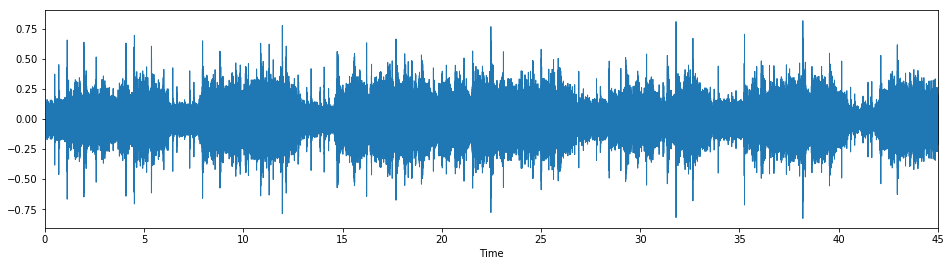

In [4]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(audio_time_series, sr=sr)

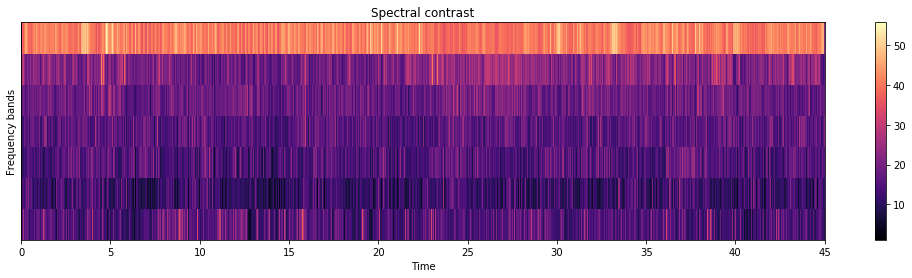

In [12]:
plt.figure(figsize=(18, 4))
librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

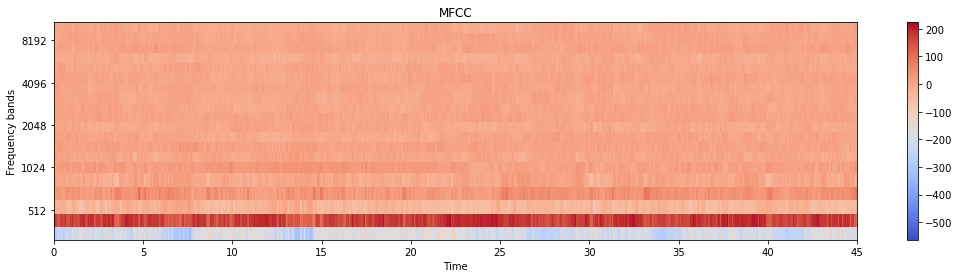

In [13]:
plt.figure(figsize=(18, 4))
librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('MFCC')

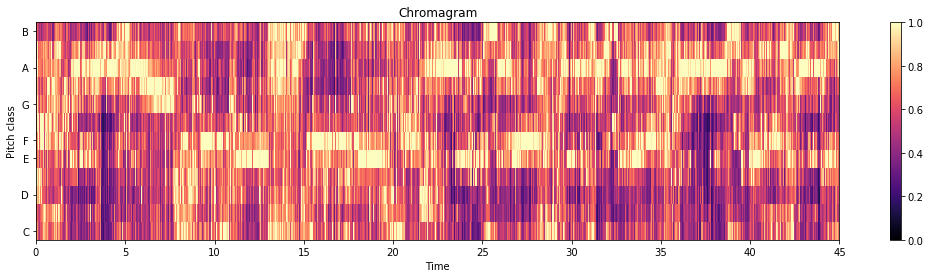

In [14]:
plt.figure(figsize=(18, 4))
librosa.display.specshow(chroma_spectogram, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chromagram')